### Практична робота 4 "Вивідна статистика"
#### ІП-13 Дем'янчук Олександр
Мета роботи: ознайомитись з
* методами визначення точкових оцінок параметрів розподілу; дослідити, що впливає на якість точкових оцінок;
* методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок;
* методами перевірки статистичних гіпотез про вигляд закону розподілу; дослідити, що впливає на ширину критичної області.


Основне завдання
1. Скачати дані файлу Data2.csv.
1. Подивитись, проаналізувати структуру
1. Вказати, чи є параметри, що розподілені за нормальним законом
1. Перевірити гіпотезу про рівність середнього і медіани для одного з параметрів
1. Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального
1. Побудувати кругову діаграму населення по регіонам

### 1. Скачати дані файлу Data2.csv.

Імпортуємо необхідні для роботи бібліотеки:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Тепер зчитаємо дані з вхідного файлу в датафрейм (з роздільником ';'):

In [20]:
df = pd.read_csv("Data2.csv", sep=';', encoding='cp1252')

### 2. Подивитись, проаналізувати структуру

Дослідимо структуру датафрейму:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


Перша видима помилка - назва колонки 'Populatiion'. Виправимо одруківку:

In [22]:
df = df.rename(columns={'Populatiion': 'Population'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Population      216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


Бачимо, що колонки 'GDP per capita', 'CO2 emission' та 'Area' не є числовими значеннями. Але для початку переглянемо їх вигляд:

In [23]:
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470


Колонки 'GDP per capita' та 'CO2 emission' записані через кому. Тепер виправимо формат цих колонок і колонки 'Area':

In [24]:
cols = [ 'GDP per capita', 'CO2 emission', 'Area' ]
for col in cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

Знову проглянемо інформацію про файл:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Population      216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


Також бачимо, що наявні пропущені значення. Замінимо їх на середні:

In [26]:
df.fillna(df.mean(numeric_only=True), inplace=True)

І знов переглянемо самі дані:

In [27]:
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0


Тепер переглянемо статистику числових даних фрейму:

In [28]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13374.833168,3.432256e+07,1.651141e+05,6.126082e+05
std,16923.316040,1.344477e+08,8.100511e+05,1.829940e+06
min,-6722.223536,1.109700e+04,1.100100e+01,-6.765900e+05
25%,2338.692157,7.956010e+05,1.954511e+03,1.045000e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.222500e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


Бачимо від'ємні значення у колонках 'GDP per capita' та Area. Замінимо їх на значення за модулем:

In [29]:
df['GDP per capita'] = df['GDP per capita'].abs()
df['Area'] = df['Area'].abs()
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13436.789146,3.432256e+07,1.651141e+05,6.188441e+05
std,16873.938339,1.344477e+08,8.100511e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


### 3. Вказати, чи є параметри, що розподілені за нормальним законом

Побудуємо гістограми для чисельних показників датафрейму:

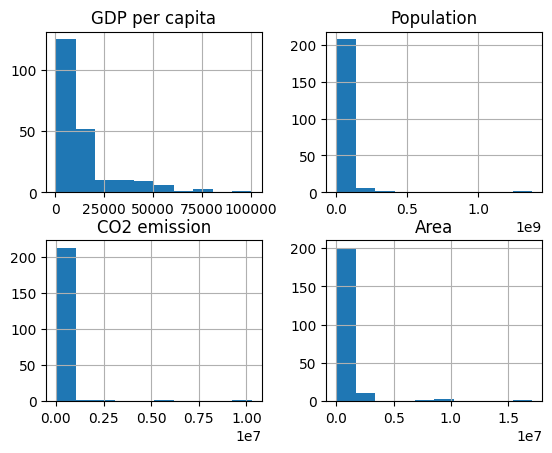

In [30]:
df.hist()
plt.show()

Візуальний аналіз не демонструє нормального розподілу на даних показниках, тому застосуємо критерій Shapiro-Wilk перевірки відповідності нормального розподілу   :

In [31]:
def is_norm_distributed(dataframe, column, alpha=0.05):
    stat, p_value = stats.shapiro(dataframe[column])
    print(f'stats: {stat:.3f}, p value: {p_value:.3f}' )
    print("Is " + column + " normally distribured? ", end='')
    print(p_value > alpha)

In [32]:
columns = ['GDP per capita', 'Population', 'CO2 emission', 'Area']

for col in columns:
    is_norm_distributed(df, col)

stats: 0.730, p value: 0.000
Is GDP per capita normally distribured? False
stats: 0.217, p value: 0.000
Is Population normally distribured? False
stats: 0.174, p value: 0.000
Is CO2 emission normally distribured? False
stats: 0.338, p value: 0.000
Is Area normally distribured? False


### 4. Перевірити гіпотезу про рівність середнього і медіани для одного з параметрів

In [33]:
p_value = stats.wilcoxon(df['GDP per capita'].mean(), df['GDP per capita'].median())[1]
print(f"p value: {p_value}")
print(f"Is mean of 'GDP per capita' equal to its median? {p_value > 0.05}")

p value: 1.0
Is mean of 'GDP per capita' equal to its median? True


###  5. Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального

In [34]:
max_pval = -1
region = None

for reg, emis in df.groupby("Region")["CO2 emission"]:
    pval = stats.shapiro(emis)[1]
    print(f"region: {reg}: p value: {pval}")
    if max_pval < pval:
        max_pval = pval
        region = reg

print(f"{region} is the region with CO2 emission distribution closest to normal (p value = {max_pval})")

region: East Asia & Pacific: p value: 1.0137837834836572e-12
region: Europe & Central Asia: p value: 3.7022774711410744e-13
region: Latin America & Caribbean: p value: 2.83462864292261e-10
region: Middle East & North Africa: p value: 1.0225892765447497e-05
region: North America: p value: 0.17751772701740265
region: South Asia: p value: 4.837930646317545e-06
region: Sub-Saharan Africa: p value: 1.385663315995678e-14
North America is the region with CO2 emission distribution closest to normal (p value = 0.17751772701740265)


### 6. Побудувати кругову діаграму населення по регіонам

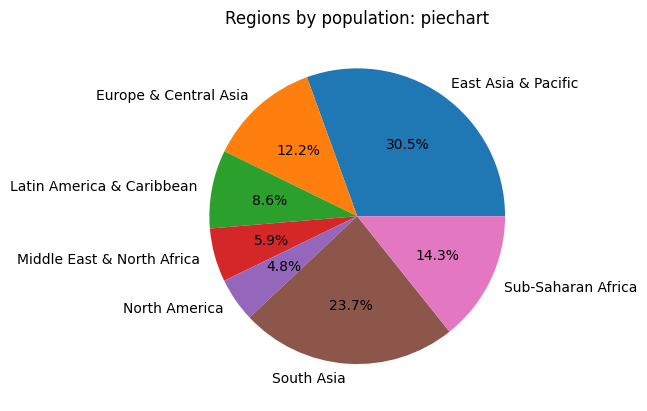

In [35]:
grpby_pop = df.groupby("Region")["Population"].sum()
plt.pie(grpby_pop, labels=grpby_pop.keys(), autopct="%1.1f%%")
plt.title("Regions by population: piechart")
plt.show()

### Висновок:
Під час виконання практичного завдання №4:
* Оцінили, чи є числові параметри виправленого датафрейму нормально розподіленими
* Перевірили гіпотезу про рівність середнього і медіани для 'GDP per capita'
* Знайшли регіон з найбільш наближеним до нормального розподілу показнику CO2 emission - ним виявилась Північна Америка
* Побудували кругову діаграму для розміру населень регіонів Землі.